## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

## Loading the cleaned dataset

In [2]:
df = pd.read_csv('df_cleaned_2.csv')
X = df.drop(columns=['id','duration_ms','loudness'])

## Scaling features

In [3]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

Now, all features will have the same weight.

## Chosing K

## Silouhette

The greater the Silouhette, the greater the separation between the clusters, In other words, the clusters will be more defined.

## Clustering the songs with K-Means

In [4]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

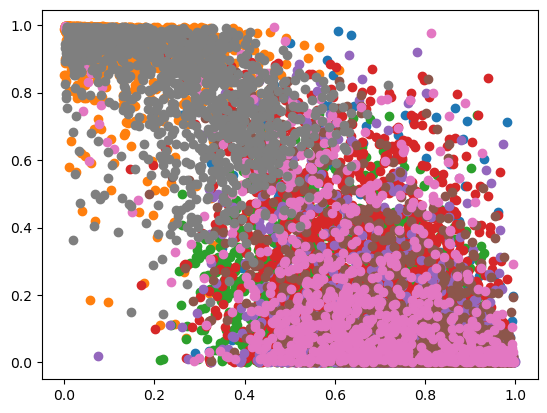

In [5]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

Now we have our "model", let's get the clusters and how many observations has each cluster.

In [6]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     777
1    1606
2    2585
3    2844
4    1311
5    1808
6     866
7    1292
dtype: int64

Now let's see to which group was assigned every song.

In [7]:
#X_df = pd.DataFrame(X)
df["cluster"] = clusters
df = df.drop(columns=['duration_ms','loudness'])

## Playing with the parameters

In [8]:
kmeans.inertia_

40139.71651064219

# Saving with pickle

In [9]:
# Save both objects together
with open("model_b.pkl", "wb") as f:
    pickle.dump((scaler, kmeans), f)

In [11]:
df.to_csv('df_clustered_b.csv', index=False)